## Title: London Airbnb Listings Analysis
Notebook Prepared by:
- Michael Mamah

## Introduction:

The world of Airbnb accommodations is a dynamic and ever-evolving landscape, with travelers and hosts seeking to make the most of this platform. The London Airbnb dataset provides a wealth of information that can guide decisions related to pricing, location, property types, and customer preferences. This Python Notebook embarks on an exploratory journey through the dataset, aiming to address ten key questions that encapsulate diverse aspects of the London Airbnb market. From the average rental prices to the distribution of minimum stay requirements, this analysis unravels the intricate tapestry of London's Airbnb landscape.


1. Average Rental Price in London on Airbnb: We kickstart our exploration by calculating the average nightly rental price, offering a foundational understanding of pricing trends in the London Airbnb market.


2. Neighbourhood Price Variations: We investigate the neighbourhoods in London with the highest and lowest average rental prices, enabling guests and hosts to make informed decisions based on location preferences and budgets.


3. Common Property Types: Discovering the most prevalent property types in the London Airbnb dataset unveils the market's composition.


4. Room Type Pricing Variation: Our analysis delves into how pricing varies across different room types, empowering customers to make choices that align with their budgets.


5. Rating and Pricing Correlation: By examining the correlation between ratings and prices, we shed light on how the quality of listings impacts pricing.


6. Top 10 Most Reviewed Listings: Highlighting the top 10 most reviewed listings facilitates guest decisions while offering valuable insights to hosts seeking to enhance their properties.


7. Top 10 Rooms with the Most Listings: We identify the top 10 room types with the highest number of listings and compare them with the most reviewed rooms to better understand market dynamics.


8. Relationship Between Reviews and Ratings: This question reveals any correlations or patterns between the number of reviews and the ratings of listings, shedding light on what makes a listing popular or well-received by guests.


9. Availability Throughout the Year by Neighbourhood: This analysis provides guests and investors with insights into accommodation availability throughout the year, enabling resource allocation, location-specific insights, and opportunities for year-round hosting.


10. Distribution of Minimum Booking Nights: Understanding the distribution of minimum stay requirements helps guests find accommodations that align with their plans and preferences, and assists hosts in setting appropriate stay requirements.

## Importing Libraries and Performing Exploratory Data Analysis

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
data = pd.read_csv('listings.csv')
data.head()

C:\Users\Michael Mamah\AppData\Local\Temp\ipykernel_13052\1191146460.py:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('listings.csv')


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,13913,Rental unit in Islington · ★4.80 · 1 bedroom · 1 bed · 1 shared bath,54730,Alina,NaN,Islington,51.56861,-0.11270,Private room,79,1,41,2022-12-11,0.26,2,360,11,NaN
1,15400,Rental unit in London · ★4.80 · 1 bedroom · 1 bed · 1 bath,60302,Philippa,NaN,Kensington and Chelsea,51.48780,-0.16813,Entire home/apt,150,7,94,2023-05-01,0.56,1,73,5,NaN
2,92644,Rental unit in Earlsfield · ★4.57 · 1 bedroom · 2 beds · 1.5 shared baths,498201,Dee Dee,NaN,Wandsworth,51.44201,-0.18739,Private room,42,2,216,2022-10-29,1.45,1,217,9,NaN
3,17402,Rental unit in London · ★4.76 · 3 bedrooms · 3 beds · 2 baths,67564,Liz,NaN,Westminster,51.52195,-0.14094,Entire home/apt,476,3,54,2022-11-19,0.36,9,300,4,NaN
4,93015,Rental unit in Hammersmith · ★4.82 · 2 bedrooms · 3 beds · 1 bath,499704,Sarah,NaN,Hammersmith and Fulham,51.49993,-0.21707,Entire home/apt,175,5,38,2022-09-30,0.27,1,40,2,NaN


In [20]:
data.shape

(87947, 18)

In [21]:
data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

In [22]:
data.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             6
neighbourhood_group               87947
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       22158
reviews_per_month                 22158
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           87946
dtype: int64

## Data Cleaning

In [23]:
data = data.drop(['neighbourhood_group', 'license', 'last_review', 'reviews_per_month'], axis=1 )

In [24]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

In [25]:
data['ratings'] = data['name'].str.extract(r'★([\d.]+)').astype(float)
data.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm,ratings
0,13913,Rental unit in Islington · ★4.80 · 1 bedroom · 1 bed · 1 shared bath,54730,Alina,Islington,51.56861,-0.11270,Private room,79,1,41,2,360,11,4.80
1,15400,Rental unit in London · ★4.80 · 1 bedroom · 1 bed · 1 bath,60302,Philippa,Kensington and Chelsea,51.48780,-0.16813,Entire home/apt,150,7,94,1,73,5,4.80
2,92644,Rental unit in Earlsfield · ★4.57 · 1 bedroom · 2 beds · 1.5 shared baths,498201,Dee Dee,Wandsworth,51.44201,-0.18739,Private room,42,2,216,1,217,9,4.57
3,17402,Rental unit in London · ★4.76 · 3 bedrooms · 3 beds · 2 baths,67564,Liz,Westminster,51.52195,-0.14094,Entire home/apt,476,3,54,9,300,4,4.76
4,93015,Rental unit in Hammersmith · ★4.82 · 2 bedrooms · 3 beds · 1 bath,499704,Sarah,Hammersmith and Fulham,51.49993,-0.21707,Entire home/apt,175,5,38,1,40,2,4.82


In [26]:
data.tail()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm,ratings
87942,973781286754517228,Rental unit in Greater London · ★New · 1 bedroom · 2 beds · 1 bath,498408783,Sal,Westminster,51.514860,-0.135980,Entire home/apt,275,2,0,2,239,0,NaN
87943,973801695874775338,Rental unit in Greater London · ★New · 1 bedroom · 1 bed · 1 bath,36645347,Josie,Southwark,51.459042,-0.055458,Entire home/apt,145,3,0,1,88,0,NaN
87944,973811685656289740,Home in Greater London · ★New · 1 bedroom · 5 beds · 2 shared baths,340514057,Mal,Merton,51.406100,-0.236126,Private room,160,1,0,1,80,0,NaN
87945,973882998775927897,Home in Greater London · ★New · 5 bedrooms · 5 beds · 1 bath,439074505,Travelnest,Hounslow,51.450997,-0.444319,Entire home/apt,680,1,0,170,364,0,NaN
87946,973895808066047620,Rental unit in Greater London · ★New · 2 bedrooms · 3 beds · 1 bath,475112423,Lea,City of London,51.515970,-0.111342,Entire home/apt,170,1,0,6,297,0,NaN


In [27]:
data['ratings'].isnull().sum()

37758

In [28]:
data['ratings'] = data['name'].str.extract(r'★([\d.]+)').astype(float)

In [29]:
# Remove ratings from the 'name' column and assign to new column called "ratings"
data['name'] = data['name'].str.replace(r'★[\d.]+', '', regex=True)
data.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm,ratings
0,13913,Rental unit in Islington · · 1 bedroom · 1 bed · 1 shared bath,54730,Alina,Islington,51.56861,-0.11270,Private room,79,1,41,2,360,11,4.80
1,15400,Rental unit in London · · 1 bedroom · 1 bed · 1 bath,60302,Philippa,Kensington and Chelsea,51.48780,-0.16813,Entire home/apt,150,7,94,1,73,5,4.80
2,92644,Rental unit in Earlsfield · · 1 bedroom · 2 beds · 1.5 shared baths,498201,Dee Dee,Wandsworth,51.44201,-0.18739,Private room,42,2,216,1,217,9,4.57
3,17402,Rental unit in London · · 3 bedrooms · 3 beds · 2 baths,67564,Liz,Westminster,51.52195,-0.14094,Entire home/apt,476,3,54,9,300,4,4.76
4,93015,Rental unit in Hammersmith · · 2 bedrooms · 3 beds · 1 bath,499704,Sarah,Hammersmith and Fulham,51.49993,-0.21707,Entire home/apt,175,5,38,1,40,2,4.82


In [30]:
data['rating_status'] = data['ratings'].apply(lambda x: 'rated' if not pd.isnull(x) else 'new')
data.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm,ratings,rating_status
0,13913,Rental unit in Islington · · 1 bedroom · 1 bed · 1 shared bath,54730,Alina,Islington,51.56861,-0.11270,Private room,79,1,41,2,360,11,4.80,rated
1,15400,Rental unit in London · · 1 bedroom · 1 bed · 1 bath,60302,Philippa,Kensington and Chelsea,51.48780,-0.16813,Entire home/apt,150,7,94,1,73,5,4.80,rated
2,92644,Rental unit in Earlsfield · · 1 bedroom · 2 beds · 1.5 shared baths,498201,Dee Dee,Wandsworth,51.44201,-0.18739,Private room,42,2,216,1,217,9,4.57,rated
3,17402,Rental unit in London · · 3 bedrooms · 3 beds · 2 baths,67564,Liz,Westminster,51.52195,-0.14094,Entire home/apt,476,3,54,9,300,4,4.76,rated
4,93015,Rental unit in Hammersmith · · 2 bedrooms · 3 beds · 1 bath,499704,Sarah,Hammersmith and Fulham,51.49993,-0.21707,Entire home/apt,175,5,38,1,40,2,4.82,rated


In [43]:
data.tail(2)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm,ratings,rating_status
87945,973882998775927897,Home in Greater London · ★New · 5 bedrooms · 5 beds · 1 bath,439074505,Travelnest,Hounslow,51.450997,-0.444319,Entire home/apt,680,1,0,170,364,0,NaN,new
87946,973895808066047620,Rental unit in Greater London · ★New · 2 bedrooms · 3 beds · 1 bath,475112423,Lea,City of London,51.515970,-0.111342,Entire home/apt,170,1,0,6,297,0,NaN,new


In [33]:
data.shape

(87947, 16)

In [35]:
# Removing records where price is equal to 0. 
# This helps work with actual available apartments and find average price
data = data[data['price'] != 0]
data.shape

(87944, 16)

## Questions and Answers

### Question 1: What is the average rental price in London on Airbnb?

This question helps us understand the general pricing trends in the market.

In [37]:
# Calculate the average nightly rental price
average_price = data['price'].mean()

# Print the result
print(f"The average nightly rental price in London on Airbnb is ${average_price:.2f}")

The average nightly rental price in London on Airbnb is $181.36


### Question 2. Which neighbourhoods in London have the highest and lowest average rental prices on Airbnb?

Answering this question helps both guests and hosts make informed decisions about their accommodation choices and planning. It's crucial for market analysis, investment opportunities, and budget planning in the context of Airbnb market in London.

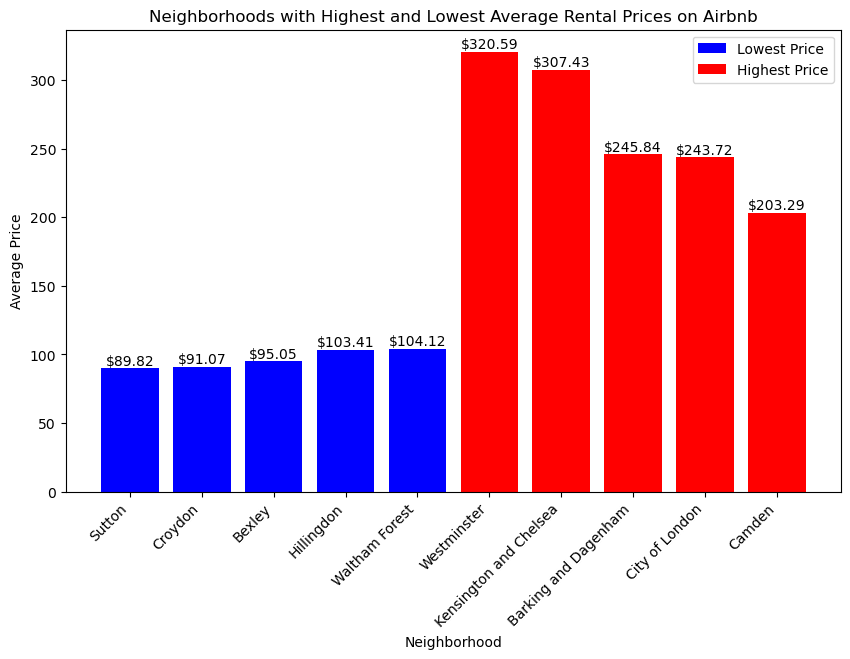

In [42]:
# Group the data by neighborhood and calculate the average price in each neighborhood
neighborhood_prices = data.groupby('neighbourhood')['price'].mean().reset_index()

# Sort the neighborhoods by average price in ascending order to find the lowest prices
lowest_price_neighborhood = neighborhood_prices.sort_values('price').head(5)

# Sort the neighborhoods by average price in descending order to find the highest prices
highest_price_neighborhood = neighborhood_prices.sort_values('price', ascending=False).head(5)

# Create a bar graph to visualize the highest and lowest average rental prices
plt.figure(figsize=(10, 6))

# Create the bars for lowest and highest prices
plt.bar(lowest_price_neighborhood['neighbourhood'], lowest_price_neighborhood['price'], label='Lowest Price', color='blue')
plt.bar(highest_price_neighborhood['neighbourhood'], highest_price_neighborhood['price'], label='Highest Price', color='red')

plt.xlabel('Neighborhood')
plt.ylabel('Average Price')
plt.title('Neighborhoods with Highest and Lowest Average Rental Prices on Airbnb')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Label the bars with average prices
for index, row in lowest_price_neighborhood.iterrows():
    plt.text(row['neighbourhood'], row['price'], f'${row["price"]:.2f}', ha='center', va='bottom', fontsize=10, color='black')

for index, row in highest_price_neighborhood.iterrows():
    plt.text(row['neighbourhood'], row['price'], f'${row["price"]:.2f}', ha='center', va='bottom', fontsize=10, color='black')

plt.show()

From the result in our **Bar Chart** above, we can observe that **Sutton** and **Croydon** have the ***lowest average rental prices***, while **Westminster**, and **Kensington and Chelsea** have the ***highest average prices*** in the London Airbnb market. This can help both customers and investors make key decisions that support needs like:

**Accessibility:** Neighborhoods like Sutton and Croydon offer more affordable accommodation options, making London accessible to budget-conscious travelers and potentially increasing the city's appeal to a broader audience.

**Luxury and Prestige:** On the other hand, Westminster and Kensington and Chelsea are associated with high-end, luxury accommodation. This reflects the demand for upscale and prestigious stays, possibly driven by tourists seeking luxurious experiences.

**Investment Opportunities:** For hosts and property investors, this information highlights the potential for profitable investments in neighborhoods with high average prices. It also suggests opportunities for providing budget-friendly accommodations in areas with lower prices.

### Question 3: What are the most common property types available on Airbnb in London

This helps you understand the market composition.

In [46]:
# Group the data by property type and count occurrences
room_type_counts = data['room_type'].value_counts()

# Get the most common property type
most_common_room_type = room_type_counts.idxmax()
count_most_common_room_type = room_type_counts.max()

print(f"The most common property type in London on Airbnb is '{most_common_room_type}' with {count_most_common_room_type} listings.")

The most common property type in London on Airbnb is 'Entire home/apt' with 54576 listings.


With ***54,576 listings***, the **"Entire home/apt"** room type is the most common in London AirBnB, and this means a lot for both customers and investors

**For Customers:**

Variety and Availability: Customers looking for an "Entire home/apt" type of accommodation have a wide variety of options to choose from. This can be appealing because it means there is likely to be something that suits their preferences, budget, and the size of their group.

**For Investors:**

Profit Potential: The high number of "Entire home/apt" listings suggests that there is demand for this type of accommodation. Investors can potentially earn a good return on investment by purchasing and renting out entire properties. This room type may command higher nightly rates compared to shared accommodations or private rooms, leading to better profit margins.

### Question 4: How does pricing vary based on room types in London AirBnB

Different property types may have different price ranges. This will help customers understand pricing and room types to look for acording to their budget.

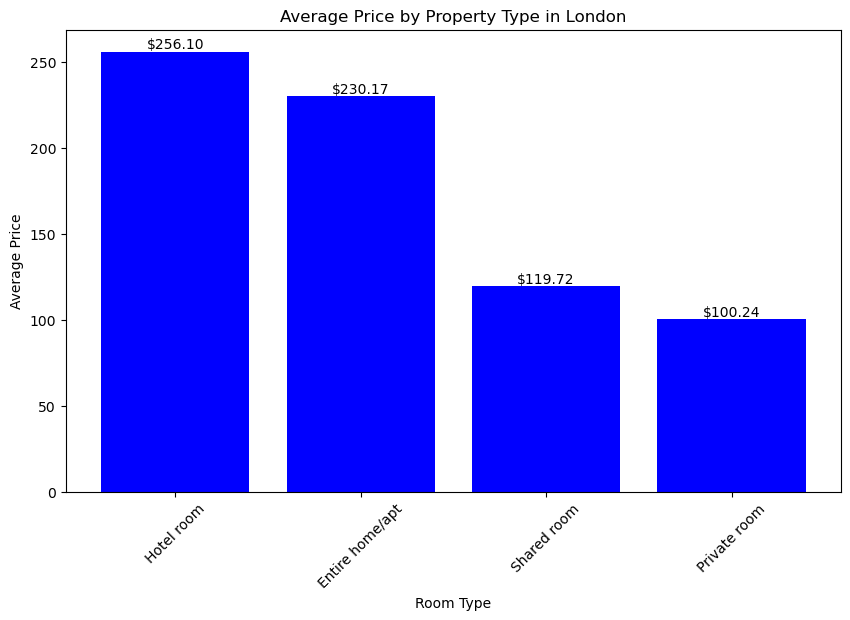

In [52]:
# Group the data by room_type and calculate the average price for each type
room_type_avg_price = data.groupby('room_type')['price'].mean().reset_index()

# Sort the property types by average price
room_type_avg_price = room_type_avg_price.sort_values(by='price', ascending=False)

# Create a bar plot to visualize the average prices
plt.figure(figsize=(10, 6))
plt.bar(room_type_avg_price['room_type'], room_type_avg_price['price'], color='blue')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.title('Average Price by Property Type in London')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Label the bars with average prices
for index, row in room_type_avg_price.iterrows():
    plt.text(row['room_type'], row['price'], f'${row["price"]:.2f}', ha='center', va='bottom', fontsize=10, color='black')

plt.show()

### Question 5: What is the average rating of Airbnb listings in London, and how does it correlate with pricing?

Ratings can provide insights into the quality of listings.

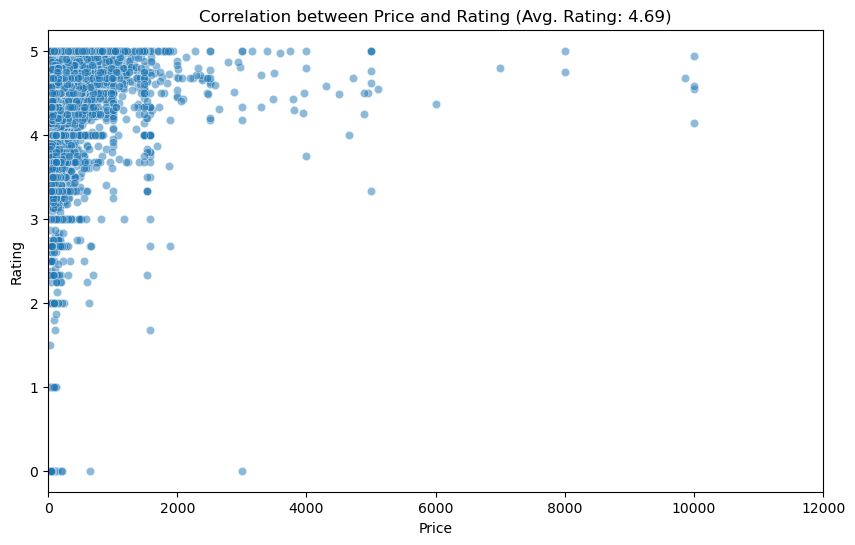

In [65]:
rated_listings = data[data['rating_status']=='rated']

# Calculate the average rating
average_rating = rated_listings['ratings'].mean()

# Create a scatter plot to visualize the correlation between rating and price
plt.figure(figsize=(10, 6))
plt.xlim(0, 12000)  # Set the x-axis limits
sns.scatterplot(data=rated_listings, x='price', y='ratings', alpha=0.5)
plt.xlabel('Price')
plt.ylabel('Rating')
plt.title(f'Correlation between Price and Rating (Avg. Rating: {average_rating:.2f})')

plt.show()

With the majority of the listings prices around the 0 to 2000 region, we can see from the scatter plot that majority of the rooms have ***high rating between 4 to 5***. This plot shows some good signs among those decribed below.

**Positive Correlation:** The data points tend to cluster in the top left area of the chart, which suggests that, on average, listings with higher prices also tend to have higher ratings. In other words, as the price of an Airbnb listing increases, the average rating also tends to increase. This is a desirable trend for both hosts and guests, as it implies that higher-priced listings are often associated with better quality or more desirable features.

**Desirability:** For customers (guests), this concentration implies that if they are willing to pay more for a London Airbnb listing, they are likely to book accommodations with higher ratings, indicating a better experience or more attractive features.

### Question 6: What are the top 10 most reviewed listings in London?

Answering this question quickly identify popular and highly-rated accommodations, making it easier for them to choose a place to stay during their visit to London. For Airbnb hosts, it offers insights into what features or qualities make a listing more appealing to guests, potentially helping them improve their properties and attract more bookings.

In [67]:
# Sort the DataFrame by the 'number_of_reviews' column in descending order
top_reviewed_listings = data.sort_values(by='number_of_reviews', ascending=False)

# Select the top 10 most reviewed listings
top_10_reviewed = top_reviewed_listings.head(10)

# Display the result
top_10_reviewed[['name', 'number_of_reviews']]

,name,number_of_reviews
29781,Boutique hotel in Bayswater · · 1 bedroom · 1 bed · 1 private bath,1536
42985,Hotel in Greater London · · 1 bedroom · 1 bed · 1 private bath,1345
18376,Rental unit in Greater London · · Studio · 1 bed · 1 bath,1314
40309,Hotel in Greater London · · 1 bedroom · 1 bed · 1 bath,1267
1402,Townhouse in London · · 1 bedroom · 1 bed · 1.5 shared baths,1029
1808,Rental unit in Greater London · · 1 bedroom · 1 bed · 1 shared bath,934
1403,Townhouse in London · · 1 bedroom · 1 bed · 1.5 baths,867
20826,Rental unit in Harlington · · 1 bedroom · 1 bed · 1 private bath,856
41517,Bed and breakfast in Greater London · · 1 bedroom · 1 bed · 1 private bath,851
2848,Home in London · · 1 bedroom · 1 bed · 1.5 shared baths,847


From the ***top 10 most reviewed*** listings in London AirBnB, we can see that the interest of many customers are majorly in the **1 Bedroom** listings with **1 bathroom (both private and non-private)**, including those with **1.5 shared baths**. 

The prevalence of 1-bedroom listings with 1 bathroom, whether private or non-private, among the top 10 most reviewed listings in London's Airbnb market indicates several key trends and insights, some of which are:

**Preferred Accommodation Type:** One-bedroom listings appear to be the most popular and sought-after type of accommodation among Airbnb guests in London. This could be due to their suitability for solo travelers, couples, or small groups, making them a versatile choice for a wide range of travelers.

**Affordability and Value:** 1-bedroom listings, including those with 1 bathroom or 1.5 shared baths, could be perceived as more affordable compared to larger accommodations. This makes them an attractive choice for budget-conscious travelers. The combination of reasonable pricing and a sufficient number of bathrooms (whether private or shared) can offer good value for guests.

### Question 7: Which Rooms are the top 10 with the most listings in London?

Answering this question will help us understand the most common and popular room types available in the Airbnb market. Comparing this information with the top 10 most reviewed rooms allows us to assess the relationship between room availability and customer demand.

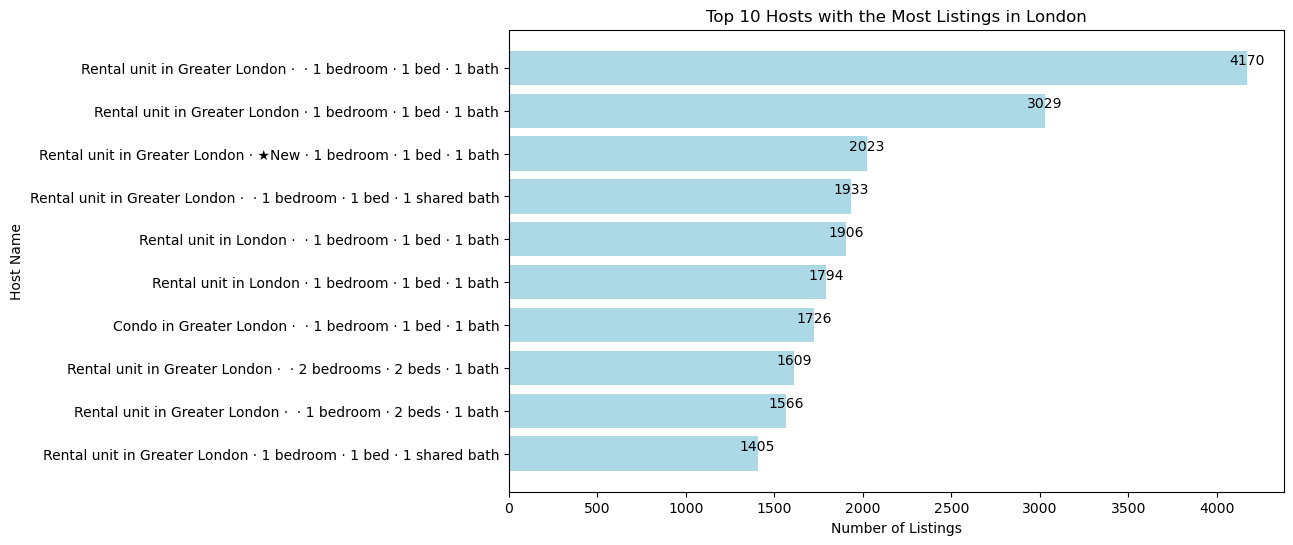

In [74]:
# Group the data by host_name and count the number of listings for each host
host_listings_count = data['name'].value_counts().reset_index()
host_listings_count.columns = ['name', 'listings_count']

# Sort the hosts by the number of listings in descending order
top_10_hosts = host_listings_count.head(10)

# Create a bar chart to visualize the top 10 hosts with the most listings
plt.figure(figsize=(10, 6))
plt.barh(top_10_hosts['name'], top_10_hosts['listings_count'], color='lightblue')
plt.xlabel('Number of Listings')
plt.ylabel('Room Name')
plt.title('Top 10 Hosts with the Most Listings in London')
plt.gca().invert_yaxis()  # Invert the y-axis for better readability

# Label the bars with average prices
for index, row in top_10_hosts.iterrows():
    plt.text(row['listings_count'], row['name'], row["listings_count"], ha='center', va='bottom', fontsize=10, color='black')
    
plt.show()

From our chart above regarding **top 10 listings** of rooms, if we compare it with the **top 10 reviewd**, we will see that only 1 **(Rental unit in Greater London · · 1 bedroom · 1 bed · 1 shared bath)** out of the top 10 rooms with the most listings are in the top 10 "most reviewed rooms".

This indicates that having a high number of listings doesn't necessarily guarantee that those listings will receive a significant number of reviews. This implies that hosts should not solely focus on increasing the quantity of their listings, but rather prioritize the quality and desirability of their offerings. 

Hosts should strive to create exceptional guest experiences, maintain their properties well, and consider factors like location, pricing, and guest satisfaction to attract more reviews and build a positive reputation on Airbnb. In summary, quality and guest satisfaction are key factors that inform hosts' success on the platform.

### Question 8: What is the relationship between the number of reviews and the rating of a listing?

Answering this question will allows you to understand if there's any correlation or pattern between the number of reviews a listing receives and its ratings. For example, do listings with more reviews tend to have higher ratings, or is there no significant correlation?

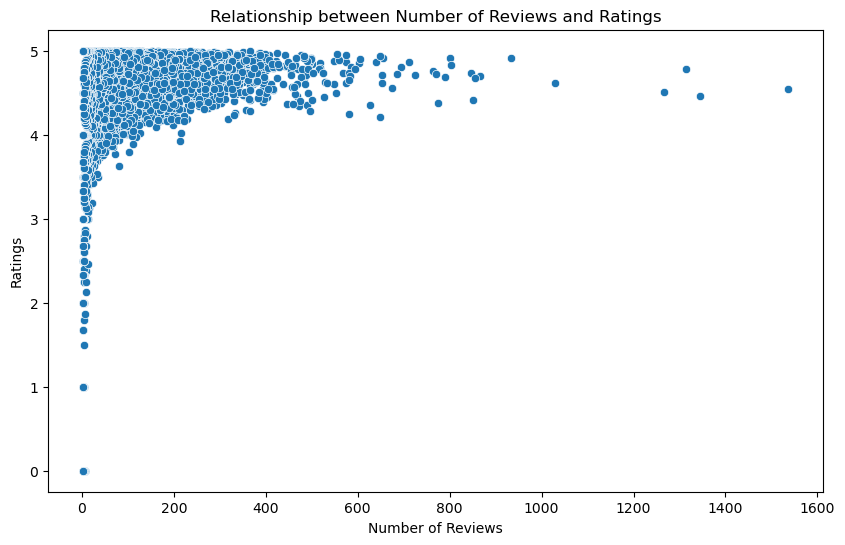

In [75]:
# Creating a scatter plot to examine the correlation

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='number_of_reviews', y='ratings')
plt.xlabel('Number of Reviews')
plt.ylabel('Ratings')
plt.title('Relationship between Number of Reviews and Ratings')

plt.show()

The strong cluster in the top-left region of the scatter plot, where there are high ratings suggests:

**Positive Guest Satisfaction:** Listings in this cluster have received high ratings, indicating that guests who have reviewed them are generally satisfied with their experiences. This is a positive sign for hosts, as it reflects guest satisfaction and a good overall impression rooms in London AirBnB.

**Possibility of Newer Listings:** These listings might be relatively new or have not yet accumulated a large number of reviews. High ratings with few reviews could be attributed to the fact that not many guests have stayed at these properties yet. Also notice that the listing with high reviews also have high ratings, so there is generally a strong correlation between **Number of reviews** and **Ratings**.

### Question 9: What is the distribution of the availability of listings throughout the year according to different neighborhood?

Answering this question can be beneficial to both customers and investors in many ways, few of which are:

**Improve Property Management:** For property managers, understanding availability patterns in different neighborhoods can aid in resource allocation, maintenance scheduling, and optimizing occupancy rates.

**Location-Specific Insights:** Gain insights into which neighborhoods are consistently in demand and which may have opportunities for growth.

**Year-Round Availability:** Hosts and guests can see the distribution of listings that are available year-round. This can be important for travelers who require accommodations at any time and for hosts who aim to provide consistent year-round rentals.

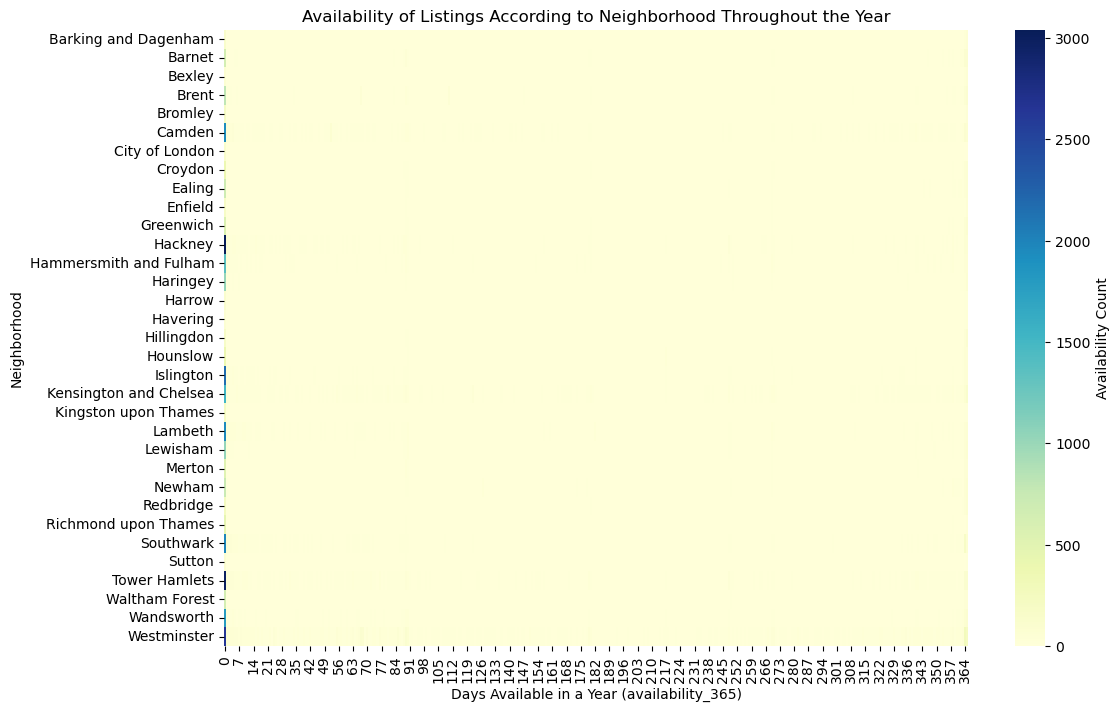

In [78]:
# Group the data by neighborhood and availability_365
neighborhood_availability = data.groupby(['neighbourhood', 'availability_365']).size().unstack(fill_value=0)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(neighborhood_availability, cmap='YlGnBu', cbar=True, cbar_kws={'label': 'Availability Count'})
plt.xlabel('Days Available in a Year (availability_365)')
plt.ylabel('Neighborhood')
plt.title('Availability of Listings According to Neighborhood Throughout the Year')
plt.show()

From the heatmap above, investors can see clearly which neighborhood in London have high investment potentials. The insights here tells that the neighborhood with few number of days of **availailabity** like **Westminster**, **Wandsworth**, and **Waltham Forest** with 21 days or less available days is a potential neighborhood for investings showing they all have full bookings.

Also, customers can also see area which have all-year-round availability and plan their visits properly.

### Question 10: What is the distribution of the minimum number of nights required for booking?


Answering this question will help guests understand the booking requirements and restrictions imposed by hosts. Some guests may prefer more flexible options with shorter minimum stays, while others might be looking for longer-term accommodations.

on the part of the hosts, it can help them analyze the distribution to set their minimum stay requirements appropriately.

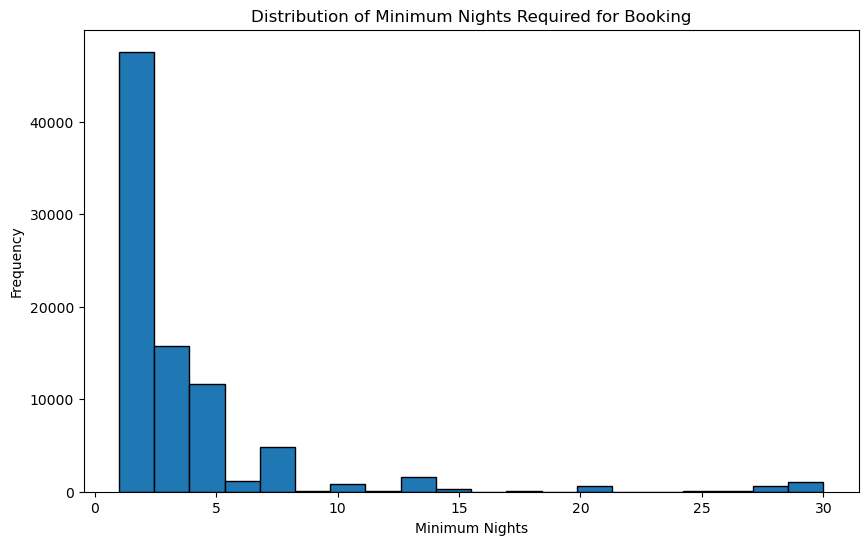

In [81]:
# Filter out rows with extremely high minimum_nights values (e.g., outliers)
max_nights = 30  # You can adjust this threshold as needed
filtered_data = data[data['minimum_nights'] <= max_nights]

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(filtered_data['minimum_nights'], bins=20, edgecolor='k')
plt.xlabel('Minimum Nights')
plt.ylabel('Frequency')
plt.title('Distribution of Minimum Nights Required for Booking')
plt.show()

WIth the result of this histogram, we can deduce that there is high frequency of listings with minimum nights required for booking **less than 5 nights**.

## Conclusion:

Exploring the London Airbnb dataset through these ten questions has unraveled multifaceted insights essential for anyone engaging in this dynamic marketplace. From pricing trends to property types, the quality of listings to booking requirements, these insights empower customers to make informed choices and hosts to optimize their properties. The London Airbnb market is a vibrant ecosystem, and understanding its intricacies is the key to success, whether you are a traveler seeking a comfortable stay or an investor looking to maximize your hosting potential.